#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

# 1. Importing Libraries

In [14]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_rows",None) 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [16]:
#Reading the dataset
df = pd.read_csv("C:/Users/pkmh_/Downloads/Learning/Unsupervised Learning/heart.csv")
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

# 2. Data Description

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.shape

(303, 14)

In [19]:
df.size

4242

In [20]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)
    
dataset_description(df)
    

No. of Columns in DataFrame:  14

Column attribute Names:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

No. of Numerical Column in DataFrame:  14

Numerical Column Names:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

No. of Categorical Column in DataFrame:  0

Categorical Column Names:  []


In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [23]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [24]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

In [25]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

# 3. Data Visualization

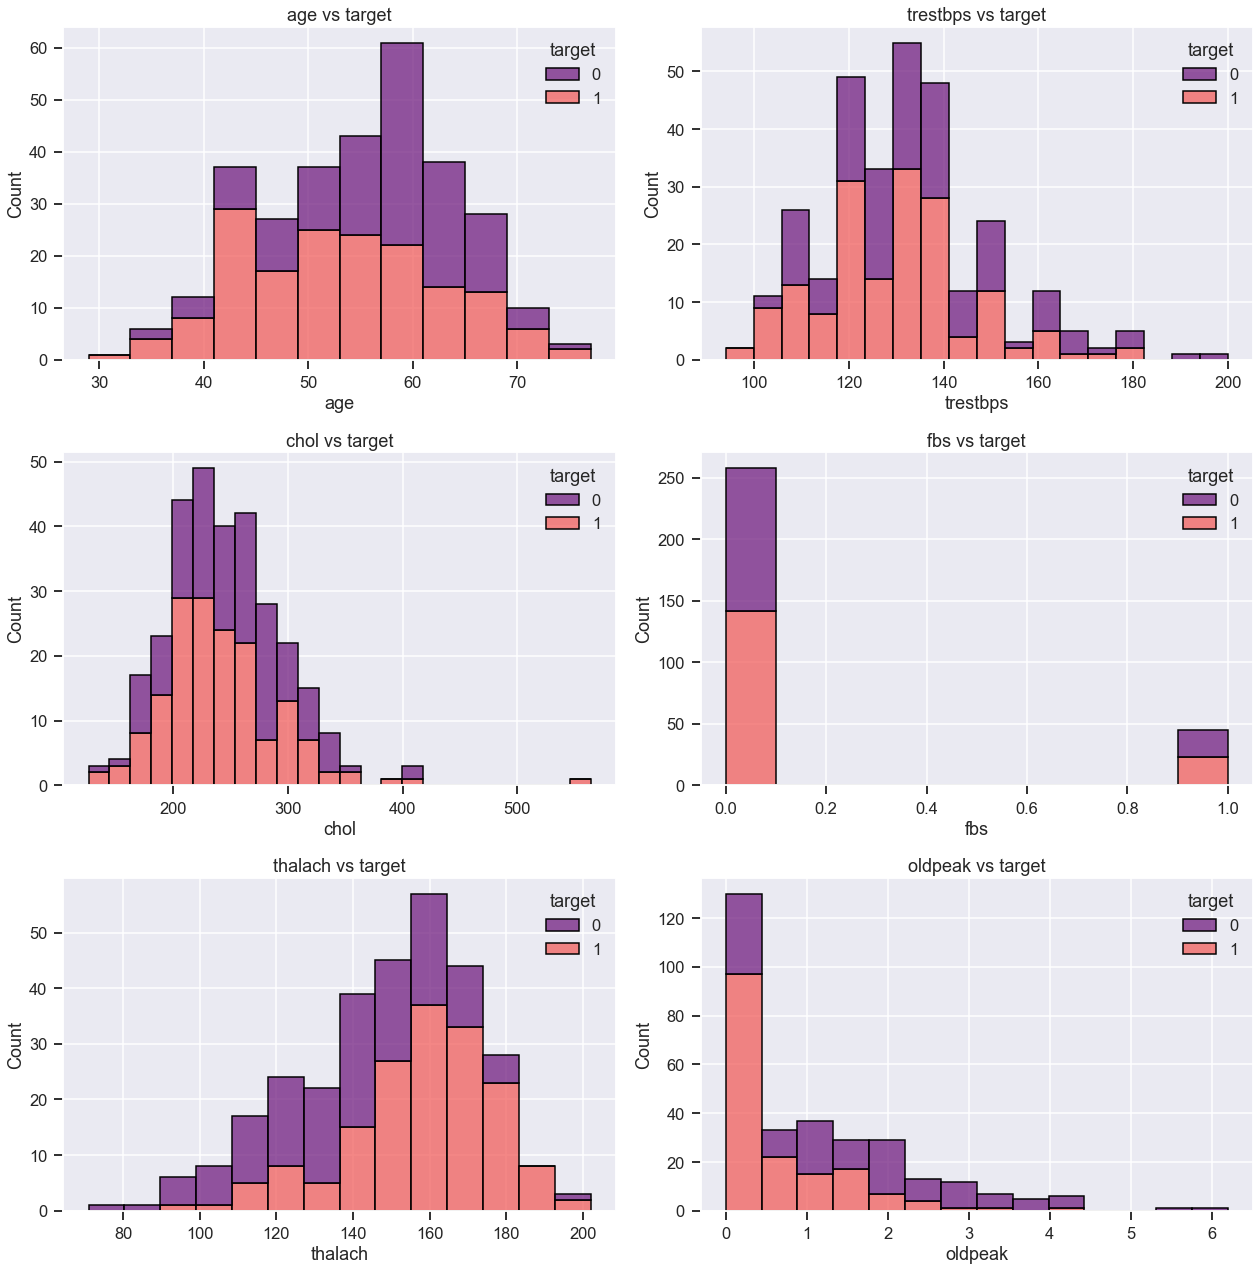

In [27]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='age', hue="target",multiple="stack",palette='magma')
plt.title('age vs target')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='trestbps', hue="target",multiple="stack",palette='magma')
plt.title('trestbps vs target')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='chol', hue="target",multiple="stack",palette='magma')
plt.title('chol vs target')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='fbs', hue="target",multiple="stack",palette='magma')
plt.title('fbs vs target')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='thalach', hue="target",multiple="stack",palette='magma')
plt.title('thalach vs target')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='oldpeak', hue="target",multiple="stack",palette='magma')
plt.title('oldpeak vs target')
plt.show()

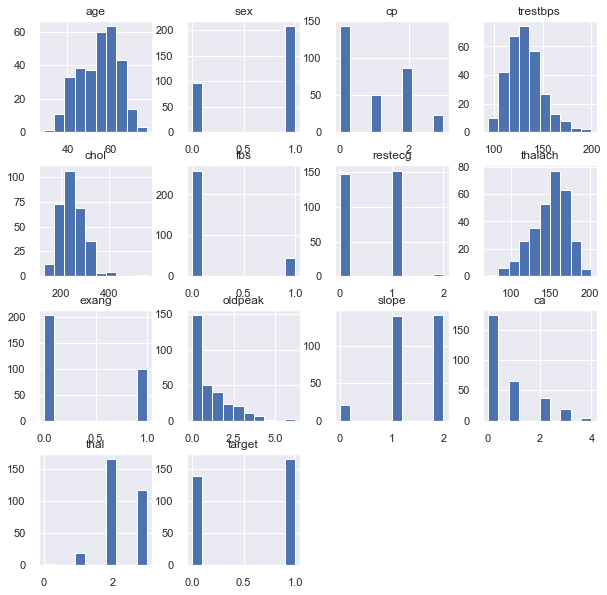

In [28]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

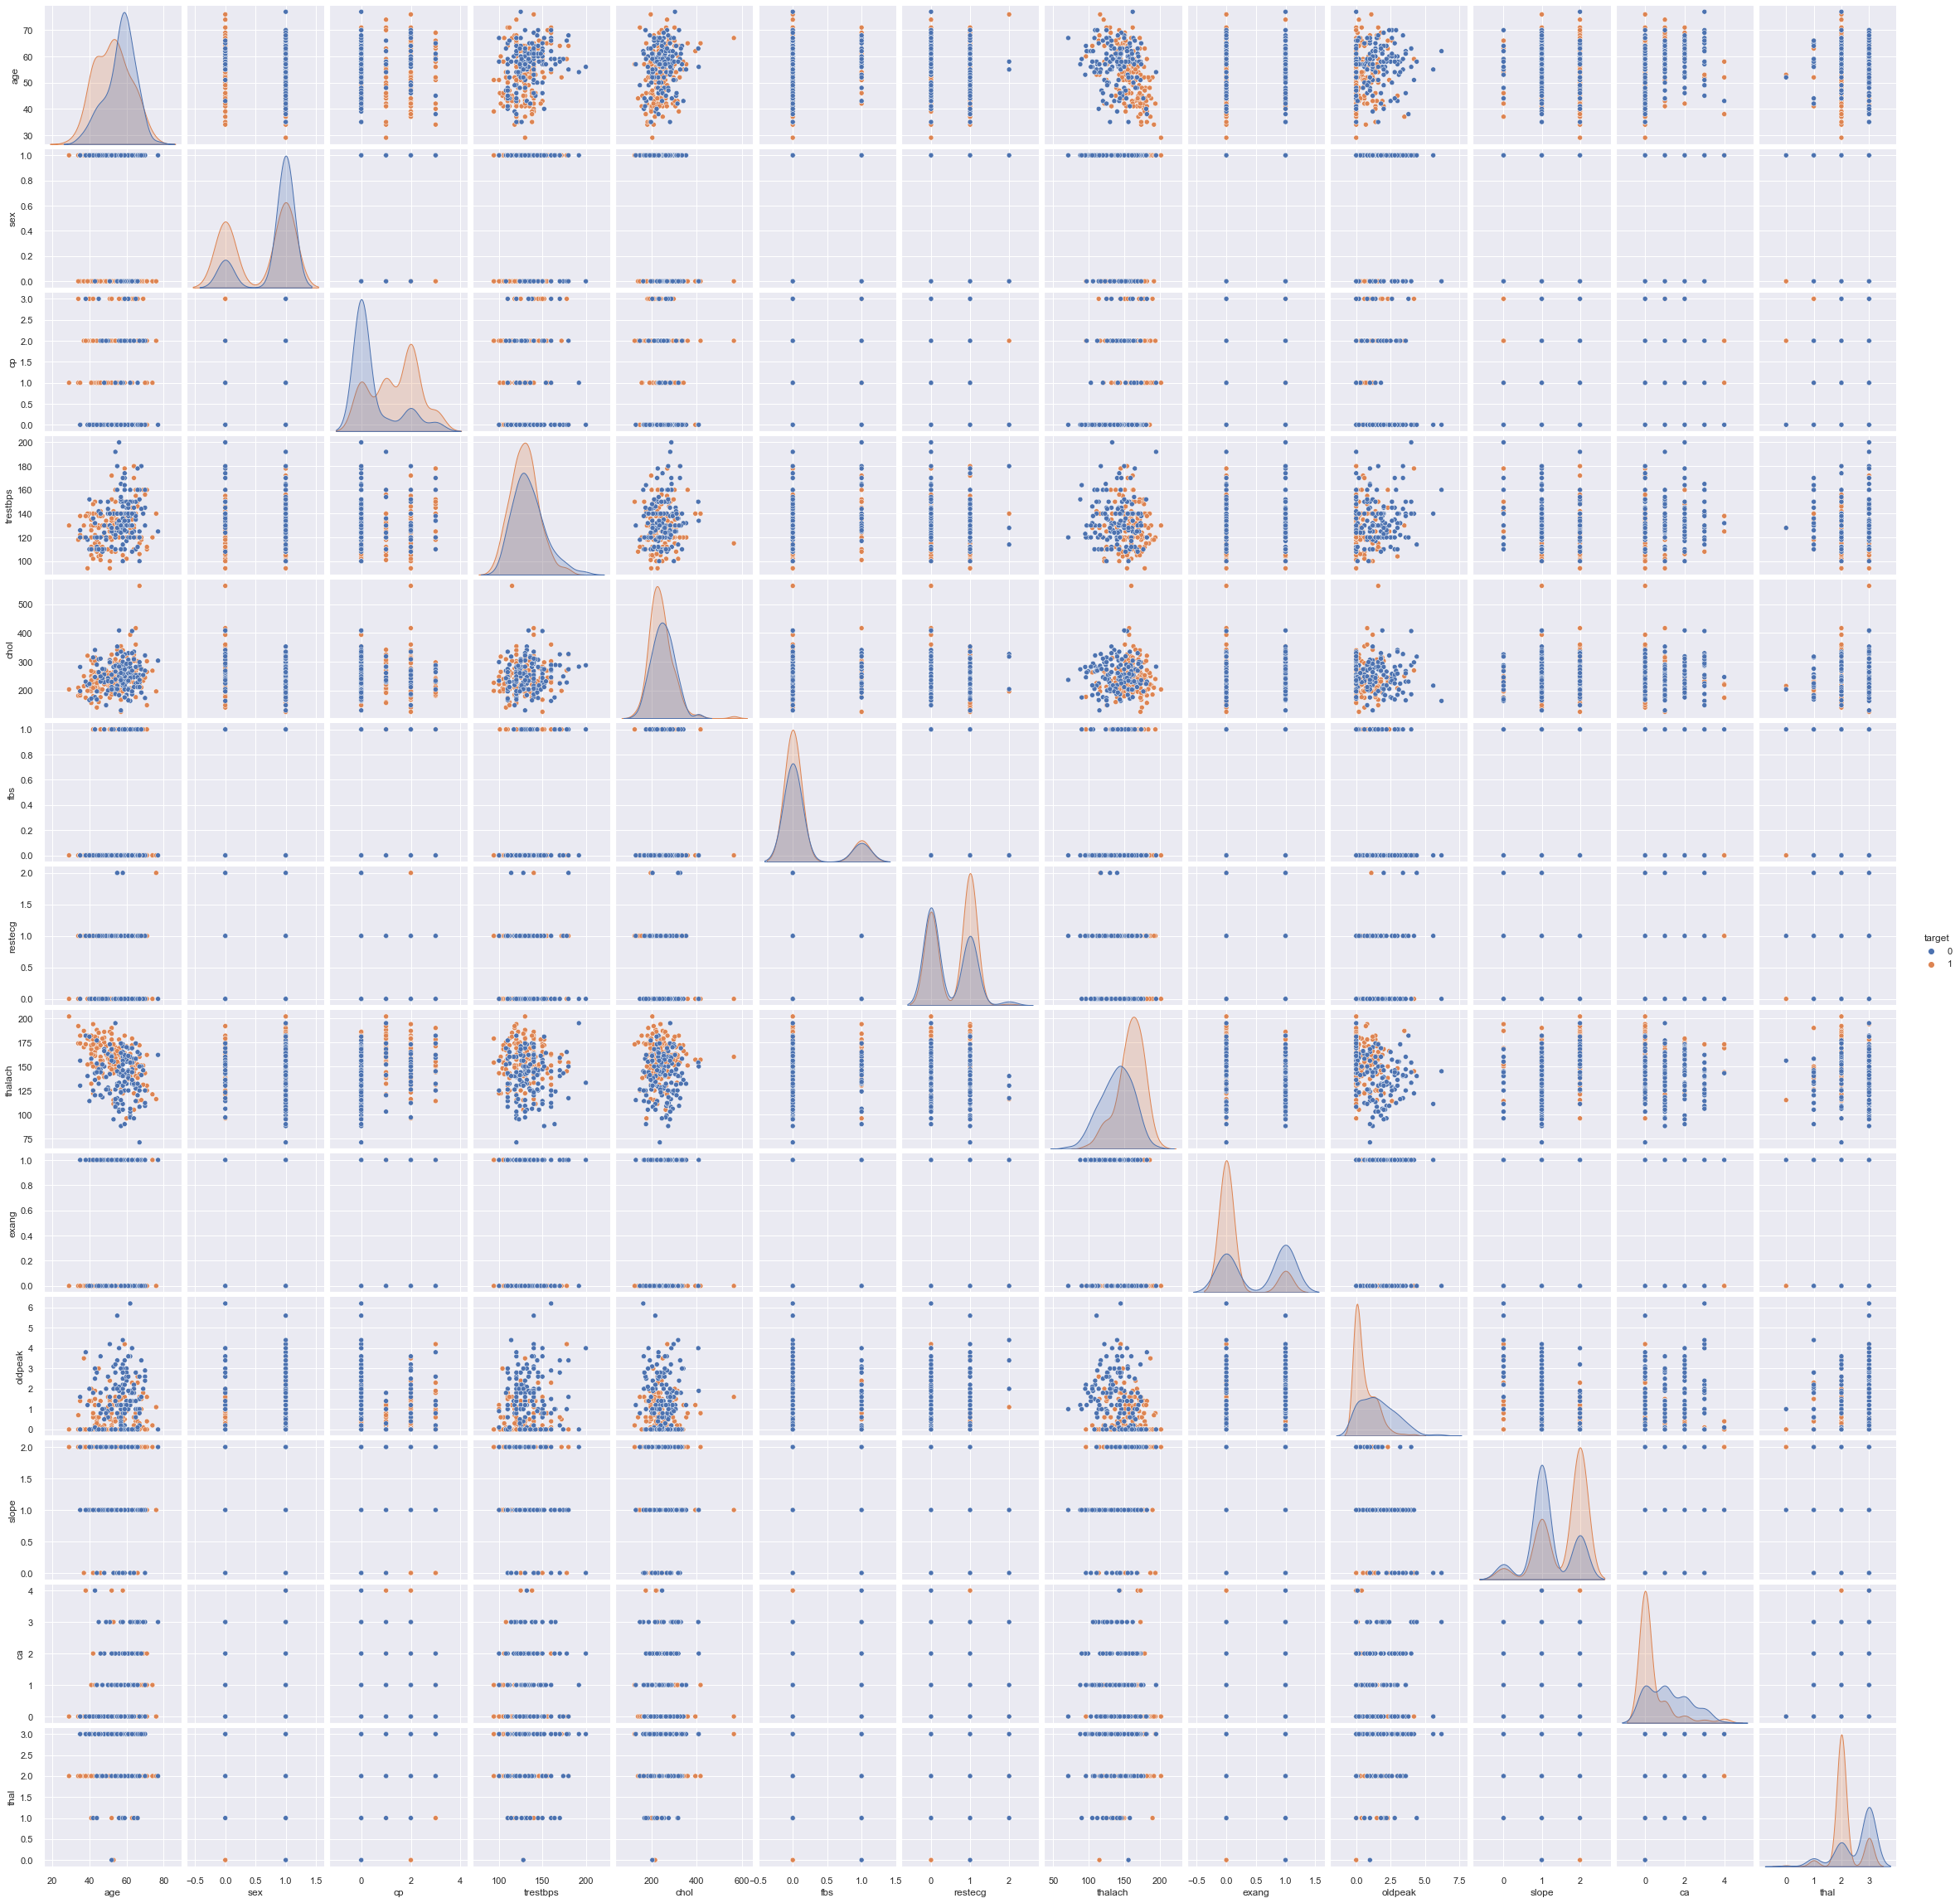

In [29]:
sns.pairplot(df,hue='target')

In [30]:
df1= df.groupby('sex').agg({'age' : 'mean', "cp":'count','trestbps':'mean','chol':'mean',
                            'fbs':'sum','restecg':'count','thalach':'mean','exang':'count','oldpeak':'mean',
                            'slope':'count','target':'sum'})
df1
# average age is same for both male and female

age   cp    trestbps        chol  fbs  restecg     thalach  exang  \
sex                                                                            
0    55.677083   96  133.083333  261.302083   12       96  151.125000     96   
1    53.758454  207  130.946860  239.289855   33      207  148.961353    207   

      oldpeak  slope  target  
sex                           
0    0.876042     96      72  
1    1.115459    207      93

In [31]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

# 4. Data Preprocessing

In [32]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [34]:
outliers_graph(df['age'])

Q25:  47.5
Q75:  61.0
Inter Quartile Range:  13.5
Outliers lie before 27.25 and beyond 81.25
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [35]:
outliers_graph(df['trestbps'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 9


In [36]:
df=df[df.trestbps>=90]
len(df)

303

In [37]:
outliers_graph(df['chol'])

Q25:  211.0
Q75:  274.5
Inter Quartile Range:  63.5
Outliers lie before 115.75 and beyond 369.75
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 5


In [38]:
df=df[df.chol<=450]  
len(df)

302

In [39]:
outliers_graph(df['fbs'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 45


In [40]:
df=df[df.thalach>=70]
len(df)

302

In [41]:
outliers_graph(df['oldpeak'])

Q25:  0.0
Q75:  1.6
Inter Quartile Range:  1.6
Outliers lie before -2.4000000000000004 and beyond 4.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 5


In [42]:
print('Mean: ',df['chol'].mean())
print('Median: ',df['chol'].median())

Mean:  245.21192052980132
Median:  240.0


In [43]:
mc=df[df['chol']>0].chol.mean() #mean value of chol without including the chol=0
print('Mean of chol>0: ',mc)

Mean of chol>0:  245.21192052980132


In [44]:
df.describe().T

count        mean        std    min     25%    50%    75%    max
age       302.0   54.324503   9.067887   29.0   47.25   55.0   61.0   77.0
sex       302.0    0.685430   0.465115    0.0    0.00    1.0    1.0    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.0    3.0
trestbps  302.0  131.678808  17.541015   94.0  120.00  130.0  140.0  200.0
chol      302.0  245.211921  48.567877  126.0  211.00  240.0  274.0  417.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.0    1.0
restecg   302.0    0.529801   0.525849    0.0    0.00    1.0    1.0    2.0
thalach   302.0  149.612583  22.935390   71.0  133.25  152.5  166.0  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.0    1.0
oldpeak   302.0    1.037748   1.162552    0.0    0.00    0.8    1.6    6.2
slope     302.0    1.400662   0.616818    0.0    1.00    1.0    2.0    2.0
ca        302.0    0.731788   1.023438    0.0    0.00    0.0    1.0    4.0
thal      302.0    2.311258   0.612011    0.0    2.00    2.0    3.0    3.0
target    302.0    0.543046   0.498970    0.0    0.00    1.0    1.0    1.0

# 4.1 One Hot Encoding

In [45]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)

In [46]:
OneHotEncoding(df['cp'])
OneHotEncoding(df['sex'])
OneHotEncoding(df['restecg'])
OneHotEncoding(df['exang'])
OneHotEncoding(df['slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



age  trestbps  chol  fbs  thalach  oldpeak  ca  thal  target  cp_1  cp_2  \
0   63       145   233    1      150      2.3   0     1       1     0     0   
1   37       130   250    0      187      3.5   0     2       1     0     1   
2   41       130   204    0      172      1.4   0     2       1     1     0   
3   56       120   236    0      178      0.8   0     2       1     1     0   
4   57       120   354    0      163      0.6   0     2       1     0     0   

   cp_3  sex_1  restecg_1  restecg_2  exang_1  slope_1  slope_2  
0     1      1          0          0        0        0        0  
1     0      1          1          0        0        0        0  
2     0      0          0          0        0        0        1  
3     0      1          1          0        0        0        1  
4     0      0          1          0        1        0        1

In [47]:
df.describe().columns.to_list()

['age',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'oldpeak',
 'ca',
 'thal',
 'target',
 'cp_1',
 'cp_2',
 'cp_3',
 'sex_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2']

# 4.2 Imputation

In [48]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['chol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
chol=[]
for i in range(0,len(df)):
  chol.append(I[i][2])
df['chol']=chol

# 5. Feature Scaling

In [50]:
# altering the DataFrame
df = df[['age',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'oldpeak',
 'ca',
 'thal',
 'cp_1',
 'cp_2',
 'cp_3',
 'sex_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'target']]
 
# printing the altered DataFrame
df.head(5)

age  trestbps   chol  fbs  thalach  oldpeak  ca  thal  cp_1  cp_2  cp_3  \
0   63       145  233.0    1      150      2.3   0     1     0     0     1   
1   37       130  250.0    0      187      3.5   0     2     0     1     0   
2   41       130  204.0    0      172      1.4   0     2     1     0     0   
3   56       120  236.0    0      178      0.8   0     2     1     0     0   
4   57       120  354.0    0      163      0.6   0     2     0     0     0   

   sex_1  restecg_1  restecg_2  exang_1  slope_1  slope_2  target  
0      1          0          0        0        0        0       1  
1      1          1          0        0        0        0       1  
2      0          0          0        0        0        1       1  
3      1          1          0        0        0        1       1  
4      0          1          0        1        0        1       1

In [51]:
scaler = StandardScaler()
scaler.fit(df.drop('target',axis = 1))

StandardScaler()

In [52]:
scaled_features = scaler.transform(df.drop('target',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

age  trestbps      chol       fbs   thalach   oldpeak        ca  \
0  0.958315  0.760692 -0.251858  2.389793  0.016920  1.087561 -0.716216   
1 -1.913705 -0.095866  0.098749 -0.418446  1.632825  2.121487 -0.716216   
2 -1.471855 -0.095866 -0.849951 -0.418446  0.977728  0.312118 -0.716216   
3  0.185079 -0.666905 -0.189986 -0.418446  1.239767 -0.204845 -0.716216   
4  0.295542 -0.666905  2.243636 -0.418446  0.584670 -0.377166 -0.716216   

       thal      cp_1      cp_2      cp_3     sex_1  restecg_1  restecg_2  \
0 -2.146097 -0.445435 -0.630990  3.482877  0.677449  -1.006645  -0.115857   
1 -0.509427 -0.445435  1.584812 -0.287119  0.677449   0.993399  -0.115857   
2 -0.509427  2.244994 -0.630990 -0.287119 -1.476126  -1.006645  -0.115857   
3 -0.509427  2.244994 -0.630990 -0.287119  0.677449   0.993399  -0.115857   
4 -0.509427 -0.445435 -0.630990 -0.287119 -1.476126   0.993399  -0.115857   

    exang_1  slope_1   slope_2  
0 -0.698344 -0.92345 -0.942072  
1 -0.698344 -0.92345 -0.942072  
2 -0.698344 -0.92345  1.061490  
3 -0.698344 -0.92345  1.061490  
4  1.431958 -0.92345  1.061490

In [53]:
df.head(5)

age  trestbps   chol  fbs  thalach  oldpeak  ca  thal  cp_1  cp_2  cp_3  \
0   63       145  233.0    1      150      2.3   0     1     0     0     1   
1   37       130  250.0    0      187      3.5   0     2     0     1     0   
2   41       130  204.0    0      172      1.4   0     2     1     0     0   
3   56       120  236.0    0      178      0.8   0     2     1     0     0   
4   57       120  354.0    0      163      0.6   0     2     0     0     0   

   sex_1  restecg_1  restecg_2  exang_1  slope_1  slope_2  target  
0      1          0          0        0        0        0       1  
1      1          1          0        0        0        0       1  
2      0          0          0        0        0        1       1  
3      1          1          0        0        0        1       1  
4      0          1          0        1        0        1       1

# 6.Feature Selection

In [54]:
col=df.describe().columns.to_list()
print(col)

['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal', 'cp_1', 'cp_2', 'cp_3', 'sex_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'target']


In [55]:
X = df_feat
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# 7.Model Selection

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.798 (0.092)
Accuracy of SVC: 0.805 (0.067)
Accuracy of RandomForest: 0.801 (0.097)


# K value estimation

In [57]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.21052631578947367
2 0.23684210526315788
3 0.19736842105263158
4 0.21052631578947367
5 0.13157894736842105
6 0.18421052631578946
7 0.14473684210526316
8 0.15789473684210525
9 0.14473684210526316
10 0.15789473684210525
11 0.11842105263157894
12 0.13157894736842105
13 0.13157894736842105
14 0.15789473684210525
15 0.13157894736842105
16 0.17105263157894737
17 0.11842105263157894
18 0.15789473684210525
19 0.13157894736842105
20 0.17105263157894737
21 0.17105263157894737
22 0.15789473684210525
23 0.15789473684210525
24 0.15789473684210525
25 0.17105263157894737
26 0.17105263157894737
27 0.17105263157894737
28 0.17105263157894737
29 0.17105263157894737
30 0.17105263157894737
31 0.15789473684210525
32 0.17105263157894737
33 0.14473684210526316
34 0.14473684210526316
35 0.13157894736842105
36 0.13157894736842105
37 0.14473684210526316
38 0.13157894736842105
39 0.14473684210526316


Text(0, 0.5, 'Error Rate')

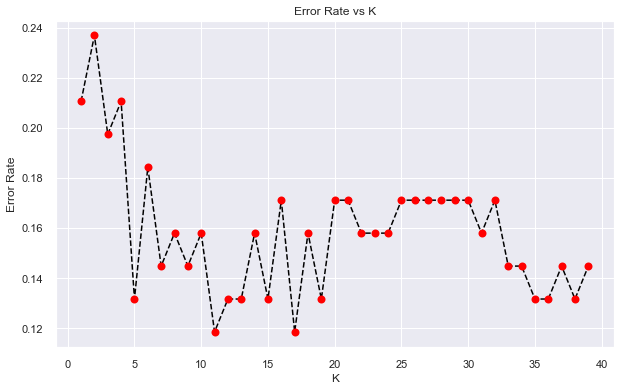

In [58]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

# KNN model

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.91      0.87      0.89        45

    accuracy                           0.87        76
   macro avg       0.86      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



------------------------
Confusion Matrix
------------------------

[[27  4]
 [ 6 39]]


C:\Users\pkmh_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



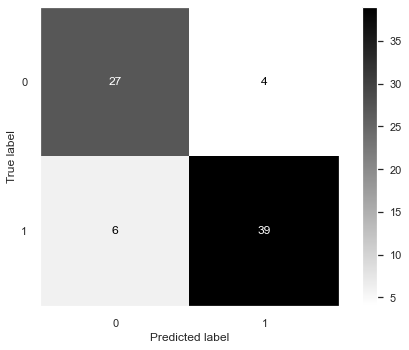

In [59]:
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# Support Vector Classifier

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.93      0.82      0.87        45

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



------------------------
Confusion Matrix
------------------------

[[28  3]
 [ 8 37]]


C:\Users\pkmh_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



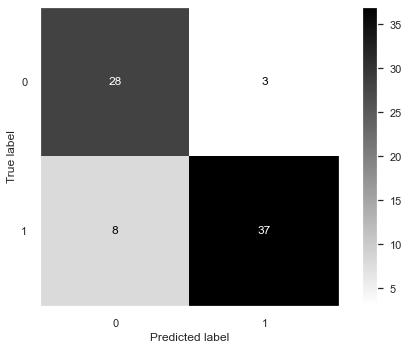

In [60]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# Parameter selectikon for Random Forest Classifier

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
rf = RandomForestClassifier()
forest = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest.fit(X_train,y_train) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 124, 146, 168,
                                                         190, 212, 234, 256,
                                                         278, 300]},
                   random_state=42, verbose=2)

In [63]:
forest.best_params_

{'n_estimators': 278,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76


------------------------
Confusion Matrix
------------------------

[[27  6]
 [ 5 38]]


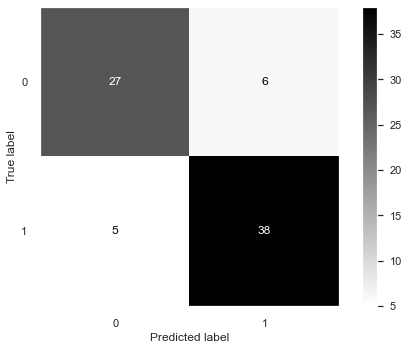

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf=RandomForestClassifier(n_estimators=124,min_samples_split= 2,
                           min_samples_leaf= 1,max_features='sqrt',max_depth=None, bootstrap=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.84      0.84      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76


------------------------
Confusion Matrix
------------------------

[[26  7]
 [ 7 36]]


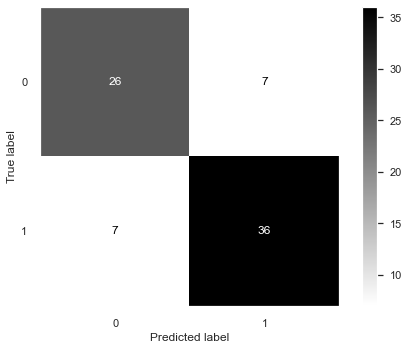

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clff, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# Conclusion

KNN model gives the accuracy of                   : 87%

Random forest gives the accuracy of               : 86%

Suport Vector Classifier gives the accuracy of    : 86%

Gradient Boosting Classifier gives the accuracy of: 82%